fruits array shape :  (300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


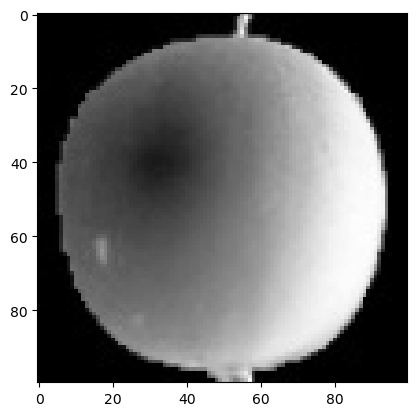

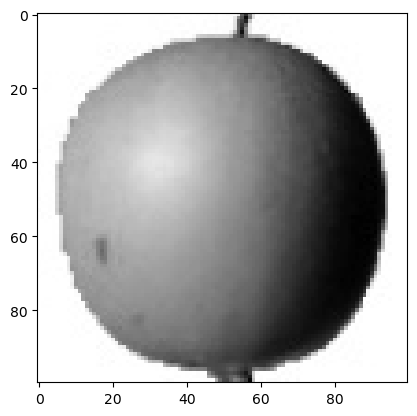

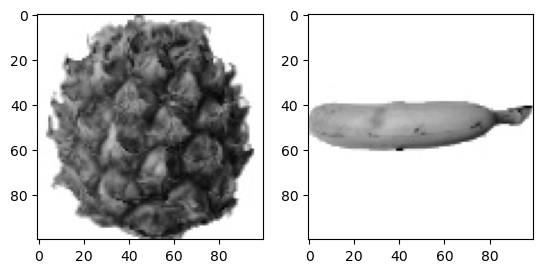

reshaped apple array :  (100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


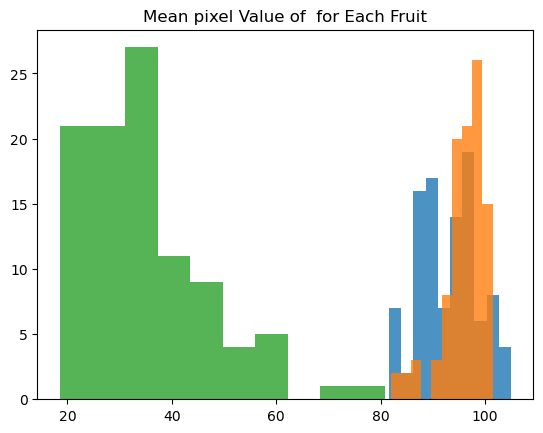

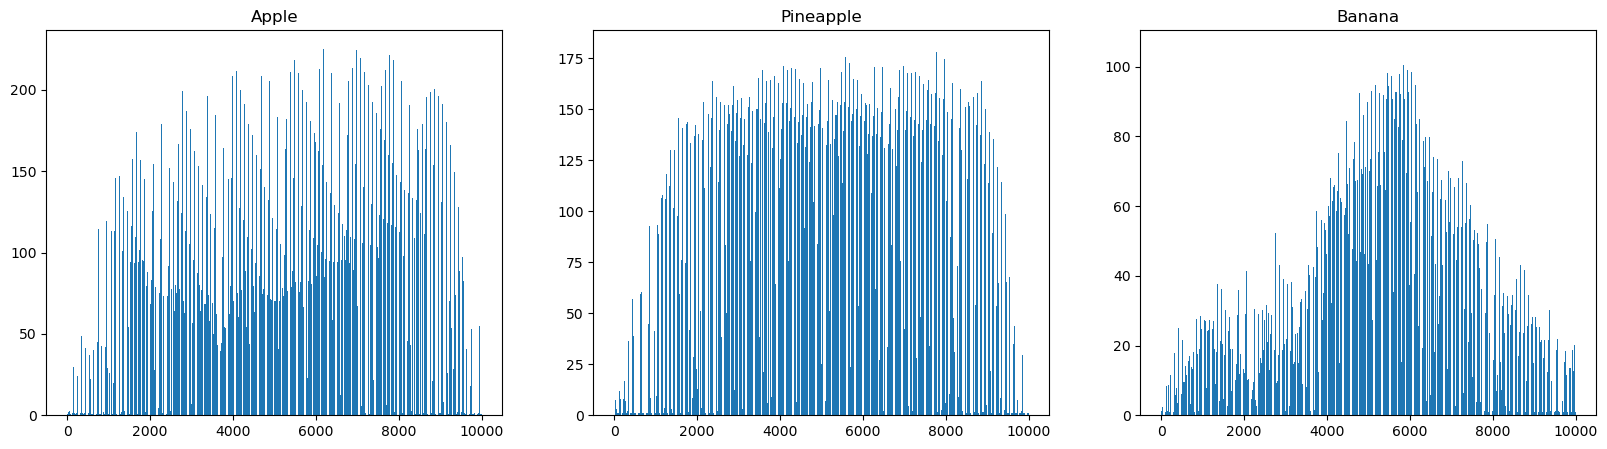

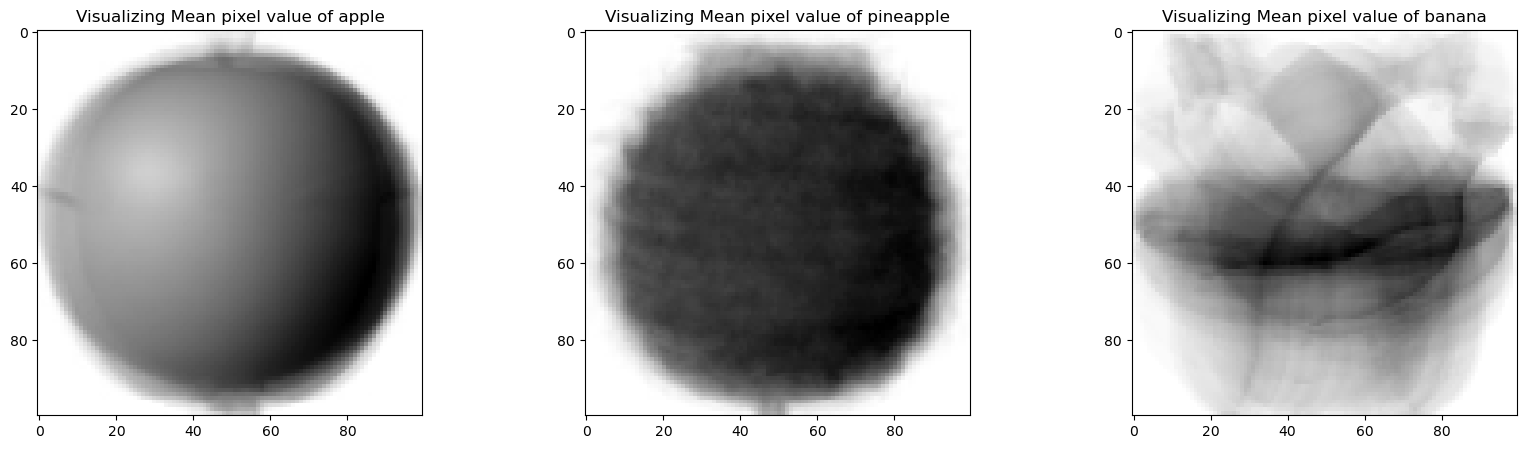

abs_diff shpae :  (300, 100, 100)
abs_mean shape :  (300,)


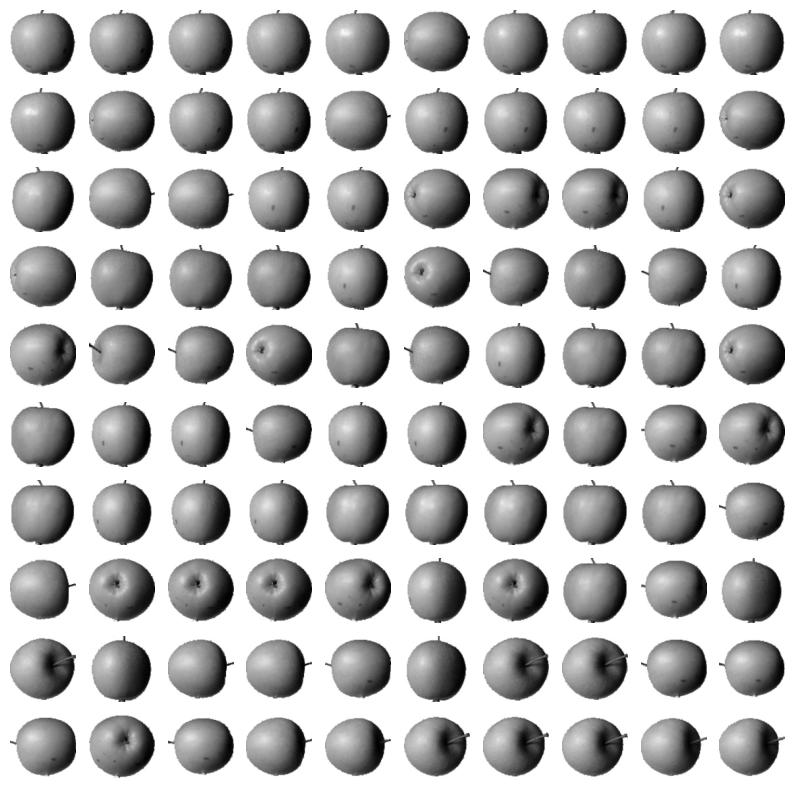

In [37]:
import urllib.request
url = 'https://bit.ly/fruits_300_data'
file_name = 'fruits_300.npy'

urllib.request.urlretrieve(url, file_name)

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load(file_name)

print('fruits array shape : ', fruits.shape)

print(fruits[0,0,:])

plt.imshow(fruits[0], cmap='gray')
plt.show()

plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()


fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print('reshaped apple array : ', apple.shape)

print(apple.mean(axis=1))

#Mean pixel value for each fruits
plt.figure()
plt.title('Mean pixel Value of  for Each Fruit')
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.show()


#Mean pixel value for each pixel -> mean of 1st-pixel value for apple  ~ 10000th-pixel value for apple (same with pineapple and banana look at the below histogram)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[0].set_title('Apple')
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[1].set_title('Pineapple')
axs[2].bar(range(10000), np.mean(banana, axis = 0))
axs[2].set_title('Banana')
plt.show()

#visualize each mean pixel value
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[0].set_title('Visualizing Mean pixel value of apple')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[1].set_title('Visualizing Mean pixel value of pineapple')
axs[2].imshow(banana_mean, cmap = 'gray_r')
axs[2].set_title('Visualizing Mean pixel value of banana')
plt.show()

#여기서 일어 나는 것도 broadcasting의 한 예.
abs_diff = np.abs(fruits - apple_mean)
#abs_diff의 각 값은 
abs_mean = np.mean(abs_diff, axis=(1,2))
print('abs_diff shpae : ', abs_diff.shape)
print('abs_mean shape : ', abs_mean.shape)

#np.argsort를 이용해서 오름차순으로 재열하고 슬라이싱을 이용해서 맨처음 100개만 따로 가져온다.
#이때 np.argsort()는 오름차순으로 재배열 한 것의 인덱스를 리턴한다.
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
        axs[i,j].axis('off')
#10개씩 10줄해서 처음 100개 그림 (전부다 사과) 을 출력.
#apple_index는 
plt.show()

(92, 272, 4)
[0 0 0 0]


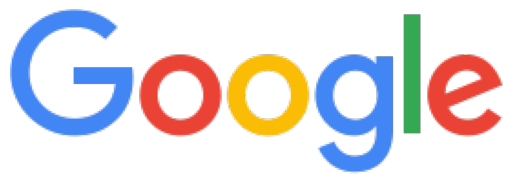

In [4]:
######sample code - print google logo #####
import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 다운로드
url = 'https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
file_name = 'google_logo.png'

urllib.request.urlretrieve(url, file_name)

# 이미지를 로드하고 NumPy 배열로 변환
image = Image.open(file_name)
image_array = np.array(image)

print(image_array.shape)  # 이미지의 모양 출력
print(image_array[0, 0, :])  # 첫 픽셀의 RGB 값 출력

# 이미지를 화면에 표시
plt.imshow(image_array)
plt.axis('off')  # 축 제거
plt.show()


이미지 데이터셋의 크기: (300, 100, 100)


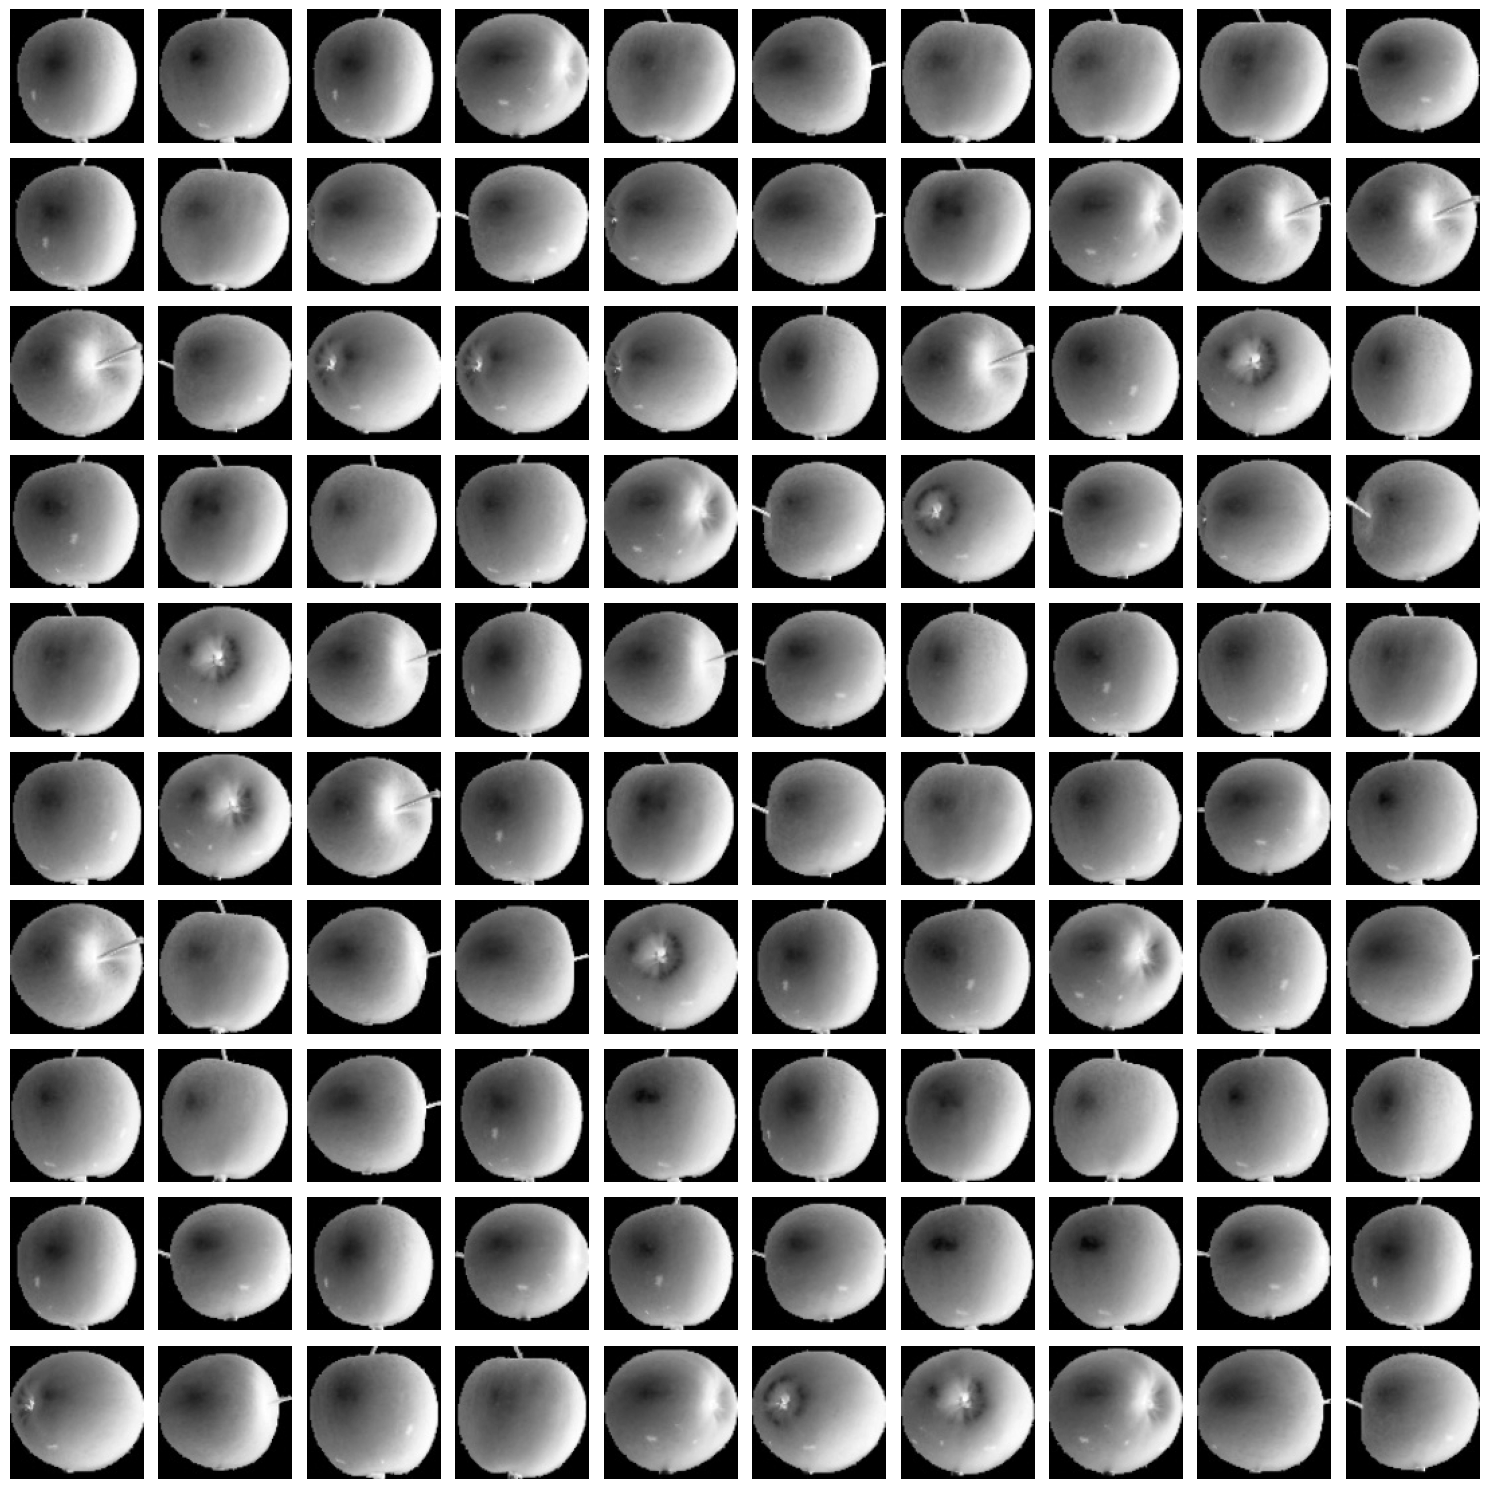

In [7]:
#####Sample Code - print 100 images of 300 images
import numpy as np
import matplotlib.pyplot as plt

# 넘파이 배열 데이터를 로드합니다.
file_name = 'fruits_300.npy'
fruits = np.load(file_name)

# 이미지 데이터셋의 크기를 출력합니다.
print(f"이미지 데이터셋의 크기: {fruits.shape}")

# 데이터셋의 이미지 개수
num_images = fruits.shape[0]

# 출력할 그리드의 행과 열을 계산합니다.
# 여기서는 최대 100개까지 출력하도록 제한하겠습니다.
max_images = 100
num_rows = min(max_images // 10, num_images // 10)
num_cols = min(10, num_images)

# 그리드로 이미지를 출력합니다.
plt.figure(figsize=(15, 15))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(fruits[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
